In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import shapely
from palettable.colorbrewer.diverging import BrBG_10

from lonboard import Map, ScatterplotLayer
from lonboard.colormap import apply_continuous_cmap

/Users/shoaib/.pyenv/versions/venv3_8_12/lib/python3.8/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(
/var/folders/w3/ky4df5s94gs548d4sl72bw3h0000gn/T/ipykernel_30789/3898927185.py:1: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this s

In [2]:
url = "https://ookla-open-data.s3.us-west-2.amazonaws.com/parquet/performance/type=mobile/year=2019/quarter=1/2019-01-01_performance_mobile_tiles.parquet"

In [3]:
# avg_d_kbps is the average download speed for that data point in kilobits per second
# tile is the WKT string representing a given zoom-16 Web Mercator tile
columns = ["avg_d_kbps", "tile"]

In [4]:
df = pd.read_parquet(url, columns=columns)

In [5]:
df.head()

,avg_d_kbps,tile
0,5983,"POLYGON((-160.021362304688 70.6381267305321, -..."
1,3748,"POLYGON((-160.043334960938 70.6344840663086, -..."
2,3364,"POLYGON((-160.043334960938 70.6326624870732, -..."
3,2381,"POLYGON((-160.037841796875 70.6344840663086, -..."
4,3047,"POLYGON((-160.037841796875 70.6326624870732, -..."


In [6]:
tile_geometries = shapely.from_wkt(df["tile"])
tile_centroids = shapely.centroid(tile_geometries)

In [7]:
gdf = gpd.GeoDataFrame(df[["avg_d_kbps"]], geometry=tile_centroids)

In [8]:
gdf = gdf.cx[-11.83:25.5, 34.9:59]

In [9]:
gdf

,avg_d_kbps,geometry
383429,13570,POINT (-2.94159 58.99673)
383430,18108,POINT (-3.29865 58.96276)
383431,5569,POINT (-3.29315 58.97125)
383432,9349,POINT (-3.29315 58.96842)
383433,11216,POINT (-3.23273 58.98541)
...,...,...
1840929,104723,POINT (25.38666 35.09519)
1840930,62540,POINT (25.44708 35.04124)
1840931,88068,POINT (25.47455 35.04124)
1840938,38255,POINT (25.38116 35.00075)


In [10]:
layer = ScatterplotLayer.from_geopandas(gdf)
map_ = Map(layers=[layer])
map_

Map(layers=[ScatterplotLayer(table=pyarrow.Table
avg_d_kbps: uint32
__index_level_0__: int64
geometry: fixed_s…

In [11]:
layer.get_fill_color = [0, 0, 200, 200]

In [12]:
min_bound = 5000
max_bound = 50000
download_speed = gdf['avg_d_kbps']
normalized_download_speed = (download_speed - min_bound) / (max_bound - min_bound)

In [13]:
normalized_download_speed

383429     0.190444
383430     0.291289
383431     0.012644
383432     0.096644
383433     0.138133
             ...   
1840929    2.216067
1840930    1.278667
1840931    1.845956
1840938    0.739000
1840939    1.927778
Name: avg_d_kbps, Length: 807221, dtype: float64

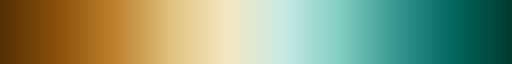

In [14]:
BrBG_10.mpl_colormap

In [15]:
layer.get_fill_color = apply_continuous_cmap(normalized_download_speed, BrBG_10)

In [16]:
# for now, cast to a numpy array until the layer is updated to support pandas series
layer.get_radius = np.array(normalized_download_speed) * 200
layer.radius_units = "meters"
layer.radius_min_pixels = 0.5